# First Exploratory Data Analysis Project

The following EDA project is based on the environmental remediation data, downloaded form kaggle dataset. Our main moto is to find the maximum useful insights using the simple exploratory data anlysis method. In this project, I have tried to use various python libraries.

Using this data, let's try to find out answers of few questions-

1. In which years projects were completed majorly?
2. Which is the most observed contaminants?
3. Top five remediated localities.
4. Which region produces the major amount of toxic contaminants? 
5. Find out the ZIPCode of those places.
6. Extract the owner details of major contaminated places.

Following is the series of actions:

1. Importing Dataset
2. Cleaning Data
3. Arranging data in the usable format
4. Getting insights from it
5. Visualising it in best possible way

## FIRST THINGS FIRST 
### Import all the required libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sn
%matplotlib inline

### Importing Dataset

In [15]:
# Let's import our data
df = pd.read_csv('environmental-remediation-sites.csv')

Lets have a basic info of our data set

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70323 entries, 0 to 70322
Data columns (total 42 columns):
Program Number              70323 non-null object
Program Type                70323 non-null object
Program Facility Name       70323 non-null object
Site Class                  70323 non-null object
Address1                    70323 non-null object
Address2                    21276 non-null object
Locality                    70200 non-null object
County                      70323 non-null object
ZIPCode                     70323 non-null object
SWIS Code                   70323 non-null int64
DEC Region                  70323 non-null int64
Latitude                    70323 non-null float64
Longitude                   70323 non-null float64
Control Code                70323 non-null object
Control Type                70323 non-null object
OU                          70323 non-null object
Project Name                59882 non-null object
Project Completion Date     70279 non-nul

From the data information, it can be inferred that many blanks cells are available in the dataset.

### 1. Years with maximum project completion

In [17]:
# Find the years with maximum projects completed
df["Project Completion Date"] = pd.to_datetime(df["Project Completion Date"])
df['Year'] = df["Project Completion Date"].dt.year
Y = df['Year'].value_counts()
Y.head(5) 

1995.0    9906
2003.0    9158
2012.0    6569
2015.0    2776
2019.0    2528
Name: Year, dtype: int64

Visualise the results obtained above using matplotlib

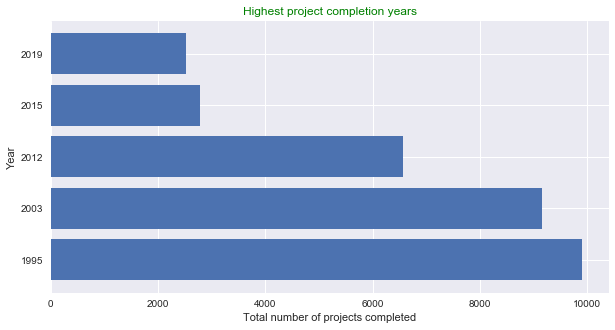

In [18]:
fig, ax = plt.subplots(1, figsize=(10, 5))
Year = ['1995', '2003', '2012', '2015', '2019']
ax.barh(np.arange(len(Year)), Y.head(5)) 
plt.yticks(np.arange(len(Year)), Year)
plt.xlabel('Total number of projects completed')
plt.ylabel('Year')
plt.title('Highest project completion years', color = 'green')
plt.show()

### 2. Five most observed contaminants throughout the years

In [19]:
X = df['Contaminants'].value_counts(dropna = True).head(10)

Visualisation of the above contaminants count

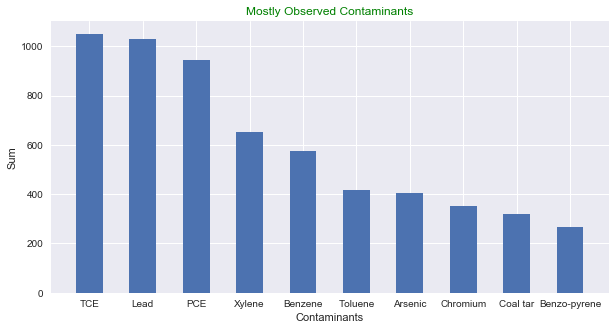

In [20]:
# Using matplotlib
fig, ax = plt.subplots(1, figsize=(10, 5))
Cont = ['TCE', 'Lead', 'PCE', 'Xylene', 'Benzene', 'Toluene', 'Arsenic', 'Chromium', 'Coal tar', 'Benzo-pyrene']
y = np.arange(len(Cont))
ax.bar(y, X-900, width = 0.5) # plotting bars on graph
plt.xticks(y, Cont)
plt.xlabel('Contaminants')
plt.ylabel('Sum')
plt.title('Mostly Observed Contaminants', color = 'green', fontsize = 'large')
plt.show()

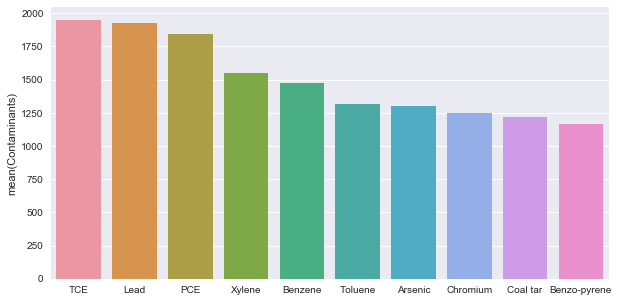

In [21]:
# Using seaborn
plt.figure(figsize = (10, 5))
sn.barplot(Cont, X)

### 3. Localities with maximum remediation projects completed so far

In [22]:
L = df['Locality'].value_counts().head(5)
L

New Cassel          20345
Syracuse             2996
Lockport             1945
Brooklyn             1814
Long Island City     1685
Name: Locality, dtype: int64

Visualisation of major remediated projects

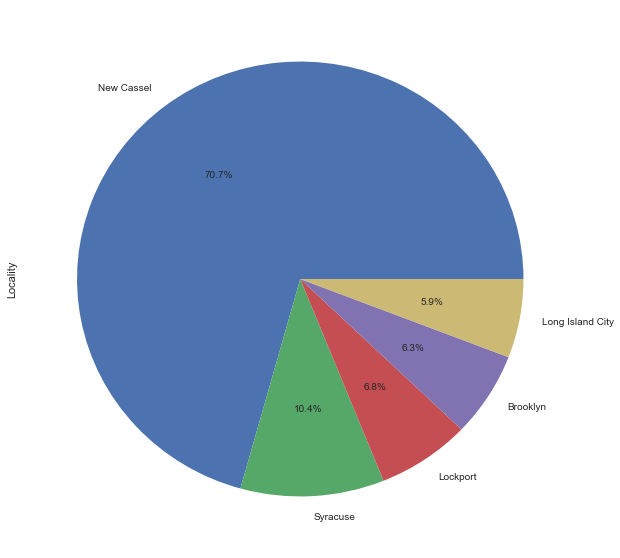

In [23]:
plt.figure(1, figsize=(10,10))
L.plot.pie(autopct="%1.1f%%")
plt.show()

### 4. Most hazardous locality
As it is explicity observed that New cassel has most remediation projects, lets extract the details of major contaminants

In [24]:
# Major Contaminants in all critical localities
M_NC = df[df['Locality'] == 'New Cassel']['Contaminants'].value_counts().sum()
M_SY = df[df['Locality'] == 'Syracuse']['Contaminants'].value_counts().sum()
M_LP = df[df['Locality'] == 'Lockport']['Contaminants'].value_counts().sum()
M_BK = df[df['Locality'] == 'Brooklyn']['Contaminants'].value_counts().sum()
M_LIC = df[df['Locality'] == 'Long Island City']['Contaminants'].value_counts().sum()

C = [M_NC, M_SY, M_LP, M_BK, M_LIC]
C

[5, 2314, 1897, 1776, 1681]

Visualisation of comparison between remediation projects and contaminants

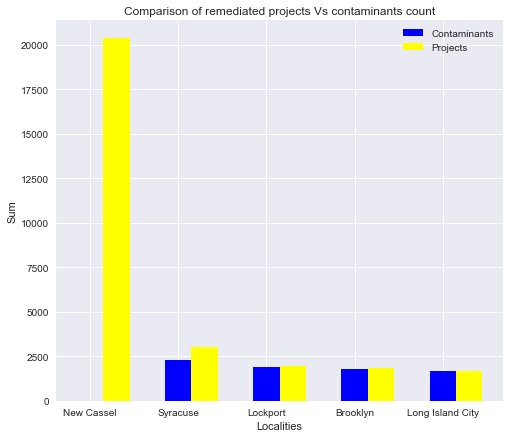

In [25]:
fig, ax = plt.subplots(figsize = (8, 7))
x = np.arange(5)
width = 0.3
regions = ['New Cassel', 'Syracuse', 'Lockport', 'Brooklyn', 'Long Island City']

q = ax.bar(x, C, width, color = 'blue')
w = ax.bar(x+width, L, width, color = 'yellow')
plt.xticks(x, regions)
plt.xlabel('Localities')
plt.ylabel('Sum')
plt.title('Comparison of remediated projects Vs contaminants count')
plt.legend((q[0], w[0]), ('Contaminants', 'Projects'))
plt.show()


Due to non-uniform data, total contaminant count is negligible in New Cassel as compared to its remediation sites. It leads us to misleading assertion. Looking at the number of remediated local counts with number of contaminants obtained, it can be inferred that Syracuse, Lockport and Brooklyn are three most hazardous localities.

### 5. ZIP Codes of hazardous areas

In [26]:
# My attempt to find out the zip_code of major contaminated places
X_ind = X.head(5).index
ZIPlist_SY = df[(df['Locality'] == "Syracuse") & (df['Contaminants'] == X_ind.any())]['ZIPCode'].value_counts().head(5)
ZIPlist_LP = df[(df['Locality'] == "Lockport") & (df['Contaminants'] == X_ind.any())]['ZIPCode'].value_counts().head(5)
ZIPlist_BK = df[(df['Locality'] == "Brooklyn") & (df['Contaminants'] == X_ind.any())]['ZIPCode'].value_counts().head(5)
ZIP_df = list([ZIPlist_SY, ZIPlist_LP, ZIPlist_BK])
#ZIP_df
ZIPCode = [ZIPlist_SY.head(4).index, ZIPlist_LP.index, ZIPlist_BK.head(3).index]
ZIPCode

[Index(['13212', '13204', '13208-1403', '13206'], dtype='object'),
 Index(['14094'], dtype='object'),
 Index(['11206', '11249', '11211'], dtype='object')]

ZIPCode is the list of all the ZIP Codes of hazardous areas in the respective localities

### 6. Owner of major contaminanted areas 

In [27]:
O = pd.Series(['13212', '13204', '13208', '13206', '14094', '11206', '11249', '11211'])
df["ZIPCode"] = df["ZIPCode"].astype('str')
df["ZIPCode"] = df["ZIPCode"].apply(lambda x: x.split("-")[0])
Owners = df[df["ZIPCode"] == O.any()]['Owner Name'].value_counts()

Owners

DEPT. A-3 REAL ESTATE TX     434
Town of Salina               431
SANITATION DIV. DRAINAGE&    423
TOWN OF SALINA               420
Name: Owner Name, dtype: int64

### Conclusion:
In conclusion, from the received data about the waste remediation projects, I have tried to extract the the effectivity of the project management team and the details to find the root cause of these harmful waste generation. Majority of these wastes are collected from the regions like Syracuse, Lockport, brooklyn etc. Along with this, we tried to find the major areas from the zip codes and tried to reach the details of those owners.